In [19]:
import warnings
warnings.filterwarnings('ignore')

#################
# My notebook issues
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
sys.path.append('home/egupta/.local/bin')

##############

import os
import numpy as np
import scipy.stats as ss
import networkx as nx
import csv 
import numpy as np
import seaborn as sns
from pandas import DataFrame
from scipy.optimize import curve_fit
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline


##qtensor imports
import qtensor
from qtensor import QAOA_energy
from qtensor import parameter_optimization as popt
import torch

Importing Graphs

In [20]:
file3 = open("20NodeRandomGraphs.txt")
mat_list = np.loadtxt(file3).reshape(55,20,20)
def mats_to_graphs(mat_list):
  """
  Given list of adjaceny matrix repr of graphs, converts to actual graphs
  """
  g_list = []
  for mat in mat_list:
    arr = np.array(mat)
    G = nx.convert_matrix.from_numpy_matrix(arr)
    g_list.append(G)
  return g_list
g_list = mats_to_graphs(mat_list)

In [21]:
file1 = open("T1_local_55_20NodeGraphs(1).txt")
results  = np.loadtxt(file1).reshape(4,3025)

In [22]:
file2 = open("T1_local_55_20NodeGraphs_Medians.txt")
more_results  = np.loadtxt(file2).reshape(5,3025)
lol1, lol2, lol3, means, medians = more_results

In [23]:
more_results

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.93433321, 0.93378826, 0.90687586, ..., 0.96872778, 0.97192763,
        0.97012017],
       [0.95405031, 0.95801848, 0.92965442, ..., 0.97325264, 0.97689972,
        0.97644593]])

In [24]:
even = [16, 17, 18, 19, 20, 21, 46, 47, 48, 49, 50, 51, 52, 53, 54]
odd = [0, 1, 2, 3, 4, 5, 22, 23, 24, 25, 26, 27, 34, 35, 36]
mix = [6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 28,
 29,
 30,
 31,
 32,
 33,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45]
alll = [i for i in range(55)]

In [25]:
def find_similarity(donor_index, acceptor_index, results, g_list=g_list, means = means, medians =medians):
  """
  Having computed results for all pairs, finds results for certain pair
  """
  n = len(g_list)
  i = donor_index*n + acceptor_index
  result = [results[0][i], results[1][i], results[2][i], means[i], medians[i]]# results[4][i] ]
  return result

def find_subresults(A, B, results):
  """
  From all pair results, returns those corresponding to A,B
  """
  xs = []
  ys = []
  a_ss= []
  s_ss = []
  s2_ss = []
  #labels = []

  for i in A:
    for j in B:
      if (i!=j):
        result = find_similarity(i, j, results)
        xs.append(result[0])
        ys.append(result[1])
        a_ss.append(result[2])
        s_ss.append(result[3])
        s2_ss.append(result[4])
        #labels.append(result[4])

  if A!=B:
    for i in B:
      for j in A:
        if(i!=j):
          result = find_similarity(i, j, results)
          xs.append(result[0])
          ys.append(result[1])
          a_ss.append(result[2])
          s_ss.append(result[3])
          s2_ss.append(result[4])
          #labels.append(result[4])
  return xs,ys,a_ss, s_ss, s2_ss#, labels

def find_subresults_self(A, results):
  """
  From all pair results, returns those corresponding to A,B
  """
  xs = []
  ys = []
  a_ss= []
  s_ss = []
  s2_ss = []
  #labels = []

  for i in A:
    for j in A:
      if (i==j):
        result = find_similarity(i, j, results)
        xs.append(result[0])
        ys.append(result[1])
        a_ss.append(result[2])
        s_ss.append(result[3])
        s2_ss.append(result[4])
        #labels.append(result[4])
  return xs,ys,a_ss, s_ss, s2_ss#, labels

In [26]:
x_odod, y_odod, a_odod, s_odod, s_med_odod = find_subresults(odd, odd, results = results)
x_evev, y_evev, a_evev, s_evev, s_med_evev = find_subresults(even, even, results = results)
x_same = x_odod + x_evev
y_same = y_odod + y_evev
a_same = a_odod + a_evev
s_same = s_odod + s_evev
s_med_same = s_med_odod + s_med_evev


In [27]:
x_diff, y_diff, a_diff, s_diff, s_med_diff = find_subresults(odd, even, results = results)
x_self, y_self, a_self, s_self, s_med_self = find_subresults_self(alll,results = results)

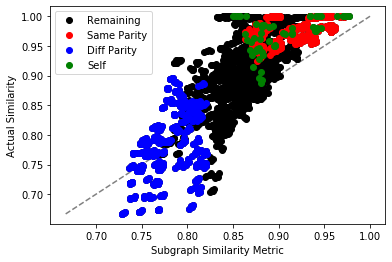

In [28]:
##########45 degree line ###########
low = min(a_diff+s_diff)
plt.plot([low, 1], [low, 1], color = 'gray', linestyle = '--')
##########################
plt.plot(results[3], results[2], color = 'black', marker = 'o', linestyle = '', label = 'Remaining' )
plt.plot(s_same, a_same, color = 'red', marker = 'o', linestyle = '', label = 'Same Parity')
plt.plot(s_diff, a_diff, color = 'blue', marker = 'o', linestyle = '', label = 'Diff Parity')
plt.plot(s_self, a_self, color = 'green', marker = 'o', linestyle = '', label = 'Self' )

################################
#clb = plt.colorbar()
#clb.ax.set_ylabel('|actual_sim - subgraph_sim|',fontsize=10)
plt.xlabel('Subgraph Similarity Metric')
plt.ylabel('Actual Similarity')
plt.legend()
plt.show()

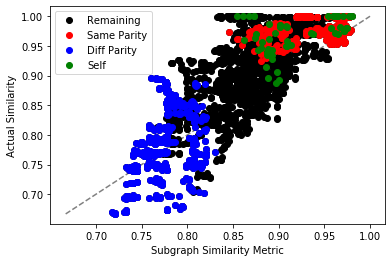

In [29]:
##########45 degree line ###########
low = min(a_diff+s_diff)
plt.plot([low, 1], [low, 1], color = 'gray', linestyle = '--')
##########################
plt.plot(medians, results[2], color = 'black', marker = 'o', linestyle = '', label = 'Remaining' )
plt.plot(s_med_same, a_same, color = 'red', marker = 'o', linestyle = '', label = 'Same Parity')
plt.plot(s_med_diff, a_diff, color = 'blue', marker = 'o', linestyle = '', label = 'Diff Parity')
plt.plot(s_med_self, a_self, color = 'green', marker = 'o', linestyle = '', label = 'Self' )

################################
#clb = plt.colorbar()
#clb.ax.set_ylabel('|actual_sim - subgraph_sim|',fontsize=10)
plt.xlabel('Subgraph Similarity Metric')
plt.ylabel('Actual Similarity')
plt.legend()
plt.show()

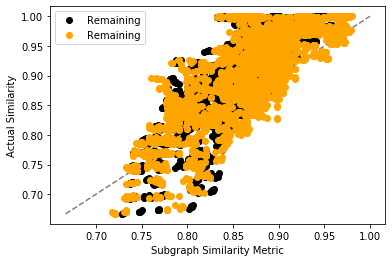

In [30]:
##########45 degree line ###########
low = min(a_diff+s_diff)
plt.plot([low, 1], [low, 1], color = 'gray', linestyle = '--')
##########################
plt.plot(results[3], results[2], color = 'black', marker = 'o', linestyle = '', label = 'Remaining' )
plt.plot(medians, results[2], color = 'orange', marker = 'o', linestyle = '', label = 'Remaining' )
################################
#clb = plt.colorbar()
#clb.ax.set_ylabel('|actual_sim - subgraph_sim|',fontsize=10)
plt.xlabel('Subgraph Similarity Metric')
plt.ylabel('Actual Similarity')
plt.legend()
plt.show()

In [33]:
s_all = results[3]
a_all = [float(i) for i in results[2]]

In [41]:
d_same = [float(a_same[i] - s_same[i]) for i in range(len(a_same))]
d_diff = [float(a_diff[i] - s_diff[i]) for i in range(len(a_diff))]
d_self = [float(a_self[i] - s_self[i]) for i in range(len(a_self))]
d_all = [float(a_all[i] - s_all[i]) for i in range(len(a_all))]

In [42]:
d_same_med = [float(a_same[i] - s_med_same[i]) for i in range(len(a_same))]
d_diff_med = [float(a_diff[i] - s_med_diff[i]) for i in range(len(a_diff))]
d_self_med = [float(a_self[i] - s_med_self[i]) for i in range(len(a_self))]
d_all_med = [float(a_all[i] - medians[i]) for i in range(len(a_all))]

In [43]:
def pad_values(array):
    """
    If not 3025 entires, will make 3025 entries
    """
    while len(array) != 3025:
        array.append(np.NAN)
    return array

In [44]:
d_same = pad_values(d_same)
d_diff = pad_values(d_diff)
d_self = pad_values(d_self)

In [45]:
d_same_med = pad_values(d_same_med)
d_diff_med = pad_values(d_diff_med)
d_self_med = pad_values(d_self_med)

In [46]:
data = []
data += [[i, "Same Parity"] for i in d_same]
data += [[i, "Diff Parity"] for i in d_diff]
data += [[i, "Self"] for i in d_self]
data += [[i, "All Pairs"] for i in d_all]

In [47]:
data_med = []
data_med += [[i, "Same Parity_med"] for i in d_same_med]
data_med += [[i, "Diff Parity_med"] for i in d_diff_med]
data_med += [[i, "Self_med"] for i in d_self_med]
data_med += [[i, "All Pairs_med"] for i in d_all_med]

In [48]:
df = DataFrame(data, columns = ['True Similarity - Similarity Metric', 'Pair Classification'])

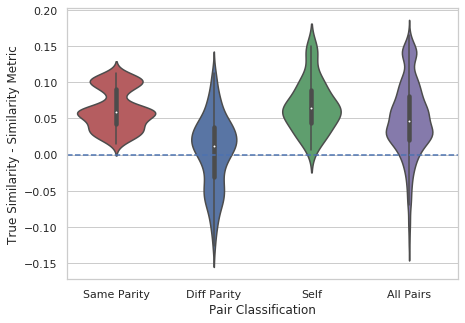

In [50]:
fig= plt.figure(figsize = (7,5))
sns.set_theme(style="whitegrid")
my_pal = {"Same Parity": "r", "Diff Parity": "b", "Self": "g", "All Pairs":"m"}
name = str("True Similarity - Similarity Metric")
ax = sns.violinplot(x="Pair Classification", y = name, data = df, palette=my_pal)
ax.axhline(0, ls='--')
plt.show()
fig.savefig("fig: AVeraging Pairs Plot Decomp July 27", dpi = 100)

In [55]:
df_med = DataFrame(data_med, columns = ['True Similarity - Similarity Metric_med', 'Pair Classification'])

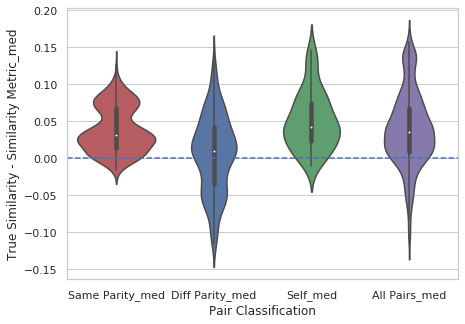

In [56]:
fig= plt.figure(figsize = (7,5))
sns.set_theme(style="whitegrid")
my_pal = {"Same Parity_med": "r", "Diff Parity_med": "b", "Self_med": "g", "All Pairs_med":"m"}
name = str("True Similarity - Similarity Metric_med")
ax = sns.violinplot(x="Pair Classification", y = name, data = df_med, palette=my_pal)
ax.axhline(0, ls='--')
plt.show()
#fig.savefig("fig: AVeraging Pairs Plot Decomp July 27", dpi = 100)

In [63]:
b_data = []
b_data += [[i, "Same Parity"] for i in d_same]
b_data += [[i, "Same Parity_med"] for i in d_same_med]
b_data += [[i, "Diff Parity"] for i in d_diff]
b_data += [[i, "Diff Parity_med"] for i in d_diff_med]
b_data += [[i, "Self"] for i in d_self]
b_data += [[i, "Self_med"] for i in d_self_med]
b_data += [[i, "All Pairs"] for i in d_all]
b_data += [[i, "All Pairs_med"] for i in d_all_med]

In [64]:
big_df = DataFrame(b_data, columns = ['True Similarity - Similarity Metric', 'Pair Classification'])

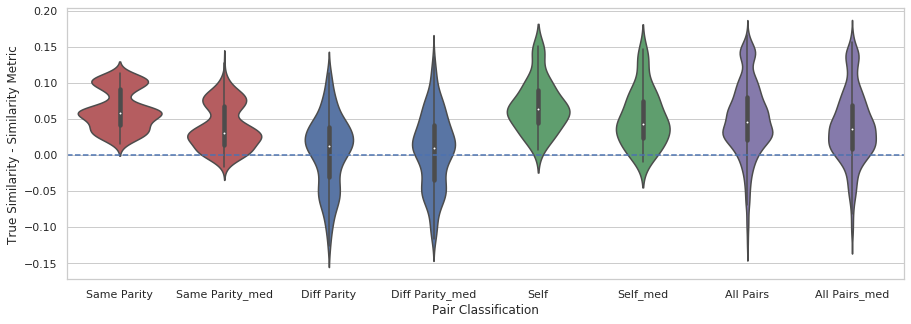

In [65]:
fig= plt.figure(figsize = (15,5))
sns.set_theme(style="whitegrid")
my_pal = {"Same Parity_med": "r", "Diff Parity_med": "b", "Self_med": "g", "All Pairs_med":"m", "Same Parity": "r", "Diff Parity": "b", "Self": "g", "All Pairs":"m"}
#my_pal += {"Same Parity_med": "r", "Diff Parity_med": "b", "Self_med": "g", "All Pairs_med":"m"}
name = str("True Similarity - Similarity Metric")
ax = sns.violinplot(x="Pair Classification", y = name, data = big_df, palette=my_pal)
ax.axhline(0, ls='--')
plt.show()
#fig.savefig("fig: AVeraging Pairs Plot Decomp July 27", dpi = 100)

<Figure size 432x288 with 0 Axes>

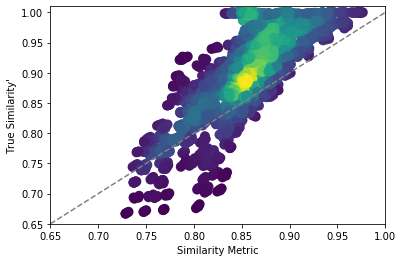

In [19]:
#plt.scatter(beta, gammafrom scipy.stats import gaussian_kde
from scipy.stats import gaussian_kde
fig = plt.figure()

fig = plt.figure(figsize = (6,4))
x =s_all
y = a_all

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# fig, ax = plt.subplots()
plt.scatter(x, y, c=z, s=100, edgecolor='')

low = 0.65
plt.plot([low, 1], [low, 1], color = 'gray', linestyle = '--')

plt.xlabel('Similarity Metric')
plt.ylabel("True Similarity'")
#plt.axes([0.65,1,0.65,1])
#plt.legend()
plt.axis([0.65,1, 0.65, 1.01])
plt.show()

fig.savefig("fig_Density_of_Simlarity_Pairs_Averaging_July27.png", dpi = 100)

In [22]:
len(x+y)

3025

In [9]:
iterr=0
total =0
for i in range(len(results[0])):
  total+=1
  if results[2][i]>0.98:
    iterr+=1
print('Pairs that have high actual similarity: '+ str(iterr)+'/'+str(total) + " which is " +str(100*(iterr/total))+ str('%'))

Pairs that have high actual similarity: 659/3025 which is 21.785123966942148%


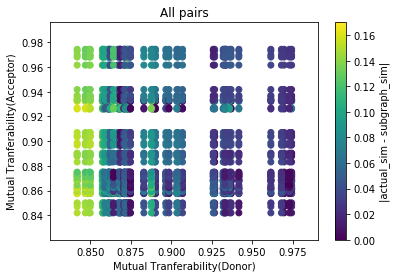

In [13]:
#@title
x_all,y_all,a_all,s_all = results
x = x_all
y = y_all
a= a_all
s = s_all
title = 'All pairs'
##########45 degree line ###########
low = min(x+y)
#plt.plot([low, 1], [low, 1], color = 'gray', linestyle = '--')
###########################################
d = [a[i]-s[i] for i in range(len(x))]
new_d = [abs(float(i)) for i in d]
plt.scatter(x,y, c = new_d, vmin = 0, vmax = .17)
################################
clb = plt.colorbar()
clb.ax.set_ylabel('|actual_sim - subgraph_sim|',fontsize=10)
plt.xlabel('Mutual Tranferability(Donor)')
plt.ylabel('Mutual Tranferability(Acceptor)')
plt.title(title)
plt.show()

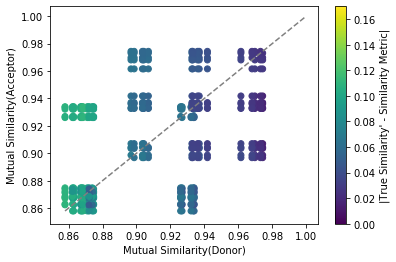

In [17]:
x = x_same
y = y_same
a= a_same
s = s_same
title = 'Same Parity'
fig = plt.figure()
##########45 degree line ###########
low = min(x+y)
plt.plot([low, 1], [low, 1], color = 'gray', linestyle = '--')
###########################################
d = [a[i]-s[i] for i in range(len(x))]
new_d = [abs(float(i)) for i in d]
plt.scatter(x,y, c = new_d, vmin = 0, vmax = .17)
################################
clb = plt.colorbar()
clb.ax.set_ylabel("|True Similarity' - Similarity Metric|",fontsize=10)
plt.xlabel('Mutual Similarity(Donor)')
plt.ylabel('Mutual Similarity(Acceptor)')
#plt.title(title)
plt.show()
fig.savefig("fig_Mutual_same.png", dpi = 100)

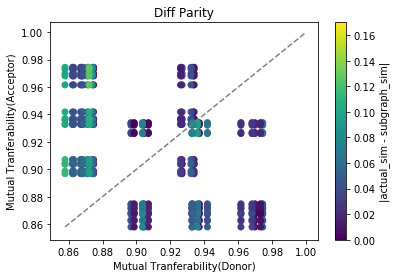

In [15]:
x = x_diff
y = y_diff
a= a_diff
s = s_diff
title = 'Diff Parity'
##########45 degree line ###########
low = min(x+y)
plt.plot([low, 1], [low, 1], color = 'gray', linestyle = '--')
###########################################
d = [a[i]-s[i] for i in range(len(x))]
new_d = [abs(float(i)) for i in d]
plt.scatter(x,y, c = new_d, vmin = 0, vmax = .17)
################################
clb = plt.colorbar()
clb.ax.set_ylabel('|actual_sim - subgraph_sim|',fontsize=10)
plt.xlabel('Mutual Tranferability(Donor)')
plt.ylabel('Mutual Tranferability(Acceptor)')
plt.title(title)
plt.show()

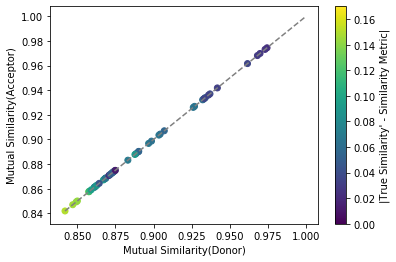

In [18]:
x = x_self
y = y_self
a= a_self
s = s_self
title = 'Self Parity'
fig = plt.figure()
##########45 degree line ###########
low = min(x+y)
plt.plot([low, 1], [low, 1], color = 'gray', linestyle = '--')
###########################################
d = [a[i]-s[i] for i in range(len(x))]
new_d = [abs(float(i)) for i in d]
plt.scatter(x,y, c = new_d, vmin = 0, vmax = .17)
################################
clb = plt.colorbar()
clb.ax.set_ylabel("|True Similarity' - Similarity Metric|",fontsize=10)
plt.xlabel('Mutual Similarity(Donor)')
plt.ylabel('Mutual Similarity(Acceptor)')
#plt.title(title)
plt.show()
fig.savefig("fig_Mutual_self.png", dpi = 100)